In [20]:
#Ejercicio 1
#Escribe una funcion que devuelva la diferencia entre la suma de los primeros n numeros al cuadrado y la suma del cuadrado de los primeros n numeros: 
#(Σ i=0 xi)**2 - Σ i=0 (xi)**2. Prueba con n = 12

def difference_sum_of_squares(n):
    sum_of_squares = sum([i**2 for i in range(1, n+1)])
    square_of_sum = sum(range(1, n+1)) ** 2
    difference = square_of_sum - sum_of_squares
    return difference

n = 12
result = difference_sum_of_squares(n)
print("Diferencia:", result)


Diferencia: 5434


Valor máximo del área del rectángulo inscrito: 1.0000000673500158
Ancho óptimo (a): 1.4142137760413411
Altura óptima (b): 0.7071067219760864


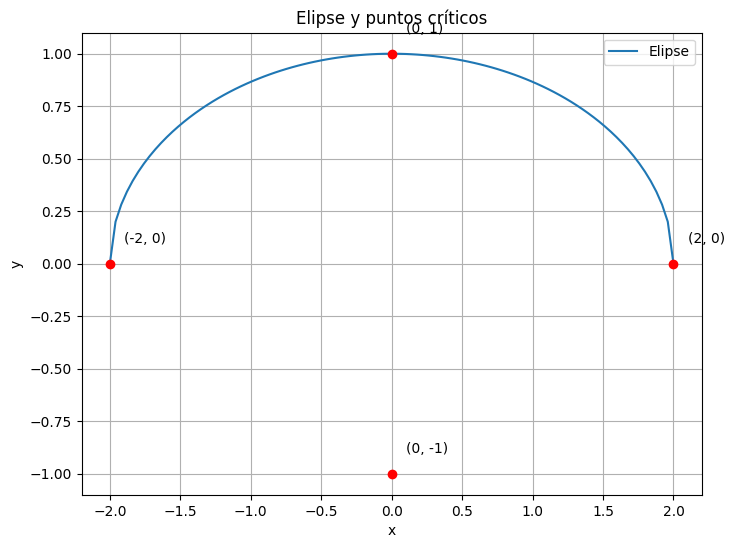

In [21]:
#Pregunta 2

#Con la siguiente eclipse x**/4 + y**2 = 1

#a) Encuentra el valor maximo del area de un rectangulo inscrito en dicha eclipse

from scipy.optimize import minimize

# Función objetivo (área del rectángulo: A = a * b)
def objective(x):
    a, b = x
    return -a * b  # Se utiliza el negativo para convertir el problema de maximización en minimización

# Restricción (puntos en la elipse: x**2/4 + y**2 - 1 = 0)
def constraint(x):
    a, b = x
    return (a**2/4 + b**2 - 1)

# Límites de las variables (a y b son positivas)
bounds = ((0, None), (0, None))

# Resolver el problema de optimización con restricciones
solution = minimize(objective, (1, 1), bounds=bounds, constraints={'type': 'eq', 'fun': constraint})

# Obtener los valores óptimos de a y b
a_opt, b_opt = solution.x

# Calcular el área óptima
area_opt = -solution.fun

print("Valor máximo del área del rectángulo inscrito:", area_opt)
print("Ancho óptimo (a):", a_opt)
print("Altura óptima (b):", b_opt)

#b) Dibuja la eplipse con sus puntos criticos

import numpy as np
import matplotlib.pyplot as plt

#Definimos la elipse

# Función de la elipse
def ellipse(x):
    return np.sqrt(1 - x**2/4)

# Rango de valores de x para trazar la elipse
x_vals = np.linspace(-2, 2, 100)

# Valores de y correspondientes a la elipse
y_vals = ellipse(x_vals)

# Puntos críticos (x, y)
crit_points = [(0, 1), (0, -1), (2, 0), (-2, 0)]


# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='Elipse')
for point in crit_points:
    plt.plot(point[0], point[1], 'ro')
    plt.text(point[0]+0.1, point[1]+0.1, f"({point[0]}, {point[1]})")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Elipse y puntos críticos')
plt.legend()
plt.grid(True)
plt.show()

-35*x/2 + 5*(7 - x)**2/2 + 245/2 - 105/x - 90/x**2


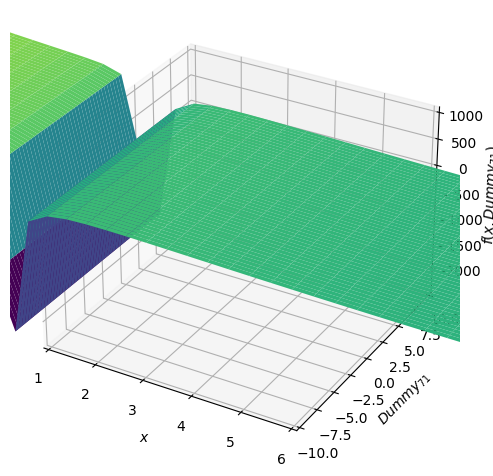

In [42]:
#Pregunta 3

#Con la siguiente integral: (x + y) 6/x<y<7-x, 1<x<6

#a) Calcula la integral
from sympy.abc import x, y
from sympy import integrate

f = x + y

i = integrate(integrate(f, (x, 1, 6)), (y, 6/x, 7-x))
print(i)

#b) Representa graficamente la region descrita
from sympy.plotting import plot3d

plot3d(i, xlim=(1, 6))

In [4]:
#Pregunta 4

#Iplementa el Método de Newton de manera que acepte funciones simbolicas. Debe devolver el valor de x, f(x) y la cantid
#de iteraciones. Recuerda: c = a - f(a)/f'(a)

from sympy import symbols, diff

def newton_method(f, x0, epsilon=1e-6, max_iterations=10):
    x = symbols('x')
    f_prime = diff(f, x)

    iteration = 0

    while iteration < max_iterations:
        f_val = f.subs(x, x0)
        f_prime_val = f_prime.subs(x, x0)

        if abs(f_prime_val) < epsilon:
            break

        x0 -= f_val / f_prime_val
        iteration += 1

    return x0, f.subs(x, x0), iteration

# Ejemplo de uso
x = symbols('x')
f = x**2 - 4

x0 = 3  # Valor inicial

solution, f_val, iterations = newton_method(f, x0)

print("Solución encontrada:", solution)
print("f(x) en la solución:", f_val)
print("Cantidad de iteraciones:", iterations)


Solución encontrada: 27813423231340017288627908966655050802740199755779147881916592711090055435173977448178539487656387757050841746637947637564405427019418251360700154817221485264134724919150029130995126843032295450899019563086781296677604690635083132708226986859006139749607395495606257948859626478810934997261096921874368144755645063136442498207280885233063919224197562401449763572075649905416901429404876859946245119891111145037408018888293328917420793469831412867147025591570397268570804385901535357970525560585142595173893463285021123165551375302018092770232089576881751928563558959411273789516534736209121342164041676087362289688347985586576159674724660733245686763642113692576705844608779983478941133512307715136557817459106445313/1390671161567000864431395448332752540137009987788957394095829635554502771758698872408926974382819387852542087331897381878220271350970912568035007740861074263206736245957501456549756342151614772544950978154339064833880234531754156635411349342950306987480369774780

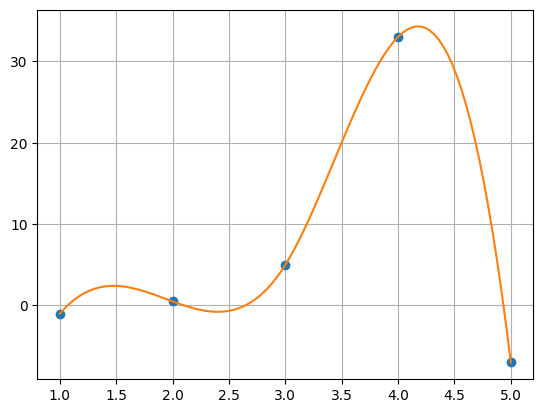

In [20]:
#Pregunta 5

#Con los siguientes puntos (1, -1), (2, 0.5), (3, 5), (4, 33), (5, -7)

#a) Obten el polinomio de interpolacion cubica
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline
import matplotlib.pyplot as plt

x_1, y_1 = zip(*[(1, -1), (2, 0.5), (3, 5), (4, 33), (5, -7)])
dominio = np.linspace(min(x_1), max(x_1), 101)

ius = InterpolatedUnivariateSpline(x_1, y_1)

#b) Representa graficamente el polinomio juntamente con los puntos 
plt.plot(x_1, y_1, "o", dominio, ius(dominio))
plt.grid(True)
plt.show()